<a href="https://colab.research.google.com/github/adityab-28/WTurbine_FS_based_CM/blob/main/AB2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!ls drive/MyDrive/T01_1009.csv

drive/MyDrive/T01_1009.csv


In [ ]:
import pandas as pd
from sklearn.neighbors import NeighborhoodComponentsAnalysis as nca

In [ ]:
data=pd.read_csv('drive/MyDrive/T01_1009.csv')

In [ ]:
timestamp = data['Timestamp']
turbine_id = data['Turbine_ID']
Y = data['Gear_Oil_Temp_Avg']
data = data.drop(['Timestamp','Turbine_ID','Gear_Oil_Temp_Avg'], axis = 1)

In [ ]:
from sklearn.neighbors import NeighborhoodComponentsAnalysis
nca = NeighborhoodComponentsAnalysis(random_state=42, n_components=54) 
nca.fit(data, Y)

NeighborhoodComponentsAnalysis(n_components=54, random_state=42)

In [ ]:
transform_data = nca.transform(data)
transform_data.shape
from sklearn.model_selection import train_test_split
#from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
X_train, X_test, y_train, y_test = train_test_split(transform_data, Y, test_size=0.3)

In [ ]:
transform_data.shape

(1008, 54)

In [ ]:
from sklearn.preprocessing import StandardScaler
std=StandardScaler()

In [ ]:
std.fit(transform_data)

StandardScaler()

In [ ]:
scaled_data=std.transform(transform_data)

In [ ]:
scaled_data

array([[-0.78645228,  0.07605994, -1.63944449, ...,  0.00321023,
        -0.15167069,  1.97258149],
       [-0.80896196, -0.13398844,  0.66740107, ..., -0.39684653,
        -0.21816496,  2.15159093],
       [-0.7373819 , -0.68708776, -0.9567442 , ..., -0.73581061,
         0.53784221, -0.07569633],
       ...,
       [-0.83688734, -0.81456186, -0.14616278, ...,  0.79649324,
         1.64403529, -0.12166988],
       [-0.83679313, -0.822454  , -0.35416485, ...,  0.27217609,
         0.04683503, -1.07657989],
       [-0.7929029 ,  0.03231796, -1.69880833, ..., -0.05359671,
        -0.94604398,  0.56681432]])

In [ ]:
X=scaled_data[:, 1:]
Y=scaled_data[:, 0]

In [ ]:
X, Y

(array([[ 7.60599381e-02, -1.63944449e+00,  1.58507800e+00, ...,
          3.21023418e-03, -1.51670694e-01,  1.97258149e+00],
        [-1.33988445e-01,  6.67401075e-01,  1.89763804e+00, ...,
         -3.96846534e-01, -2.18164963e-01,  2.15159093e+00],
        [-6.87087763e-01, -9.56744199e-01,  3.59765292e+00, ...,
         -7.35810611e-01,  5.37842208e-01, -7.56963346e-02],
        ...,
        [-8.14561856e-01, -1.46162779e-01, -4.76083475e-01, ...,
          7.96493241e-01,  1.64403529e+00, -1.21669876e-01],
        [-8.22454003e-01, -3.54164855e-01, -5.40311986e-01, ...,
          2.72176094e-01,  4.68350327e-02, -1.07657989e+00],
        [ 3.23179609e-02, -1.69880833e+00,  1.57474174e+00, ...,
         -5.35967148e-02, -9.46043978e-01,  5.66814317e-01]]),
 array([-0.78645228, -0.80896196, -0.7373819 , ..., -0.83688734,
        -0.83679313, -0.7929029 ]))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler

In [ ]:
"""random_state=0
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.5, 
                     random_state=random_state)

# Reduce dimension to 2 with NeighborhoodComponentAnalysis
nca = make_pipeline(StandardScaler(),
                    NeighborhoodComponentsAnalysis(n_components=2,
                                                   random_state=random_state))
"""

#Linear regression

In [ ]:
random_state=0
# Split into train/test
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, 
                     random_state=random_state)

In [ ]:
import numpy as np
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

In [ ]:
lin=reg.fit(X_train, y_train)

In [ ]:
lin.score(X_test, y_test)

-0.09407757261672423

In [ ]:
Y, lin.predict(X)

(array([-0.78645228, -0.80896196, -0.7373819 , ..., -0.83688734,
        -0.83679313, -0.7929029 ]),
 array([-0.27130839,  0.0034836 , -0.36096277, ...,  0.06864264,
         0.02137285,  0.27405402]))

In [ ]:
import matplotlib.pyplot as plt

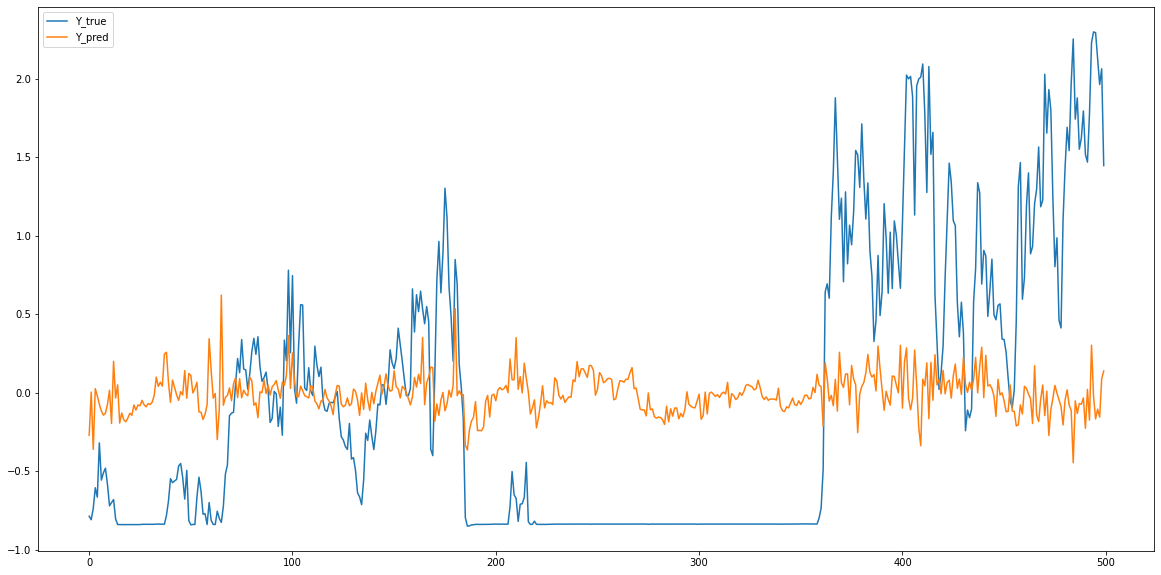

In [ ]:
y_pred=lin.predict(X)
plt.figure(figsize=(20, 10))
plt.plot(Y[:500], label='Y_true')
plt.plot(y_pred[:500], label='Y_pred')
plt.legend()

#ANN

In [ ]:
X_train.shape, y_test.shape

((705, 53), (303,))

In [ ]:
from keras.models import Sequential
from keras.layers import Dense

In [ ]:
model=Sequential()
model.add(Dense(units=54, activation='relu', input_shape=(53,)))
model.add(Dense(units=54, activation='relu'))
model.add(Dense(units=27, activation='relu'))
model.add(Dense(units=27, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mse')

In [ ]:
model.fit(X_train, y_train, epochs=20, verbose=1, validation_split=0.3)

Epoch 1/20
16/16 [==============================] - 2s 39ms/step - loss: 0.9796 - val_loss: 0.8928
Epoch 2/20
16/16 [==============================] - 0s 10ms/step - loss: 0.8920 - val_loss: 0.8629
Epoch 3/20
16/16 [==============================] - 0s 11ms/step - loss: 0.7891 - val_loss: 0.8068
Epoch 4/20
16/16 [==============================] - 0s 12ms/step - loss: 0.6350 - val_loss: 0.7287
Epoch 5/20
16/16 [==============================] - 0s 13ms/step - loss: 0.4461 - val_loss: 0.5957
Epoch 6/20
16/16 [==============================] - 0s 10ms/step - loss: 0.2872 - val_loss: 0.5086
Epoch 7/20
16/16 [==============================] - 0s 10ms/step - loss: 0.1712 - val_loss: 0.4316
Epoch 8/20
16/16 [==============================] - 0s 9ms/step - loss: 0.1150 - val_loss: 0.3798
Epoch 9/20
16/16 [==============================] - 0s 10ms/step - loss: 0.0890 - val_loss: 0.3815
Epoch 10/20
16/16 [==============================] - 0s 15ms/step - loss: 0.0675 - val_loss: 0.3275
Epoch 11/2

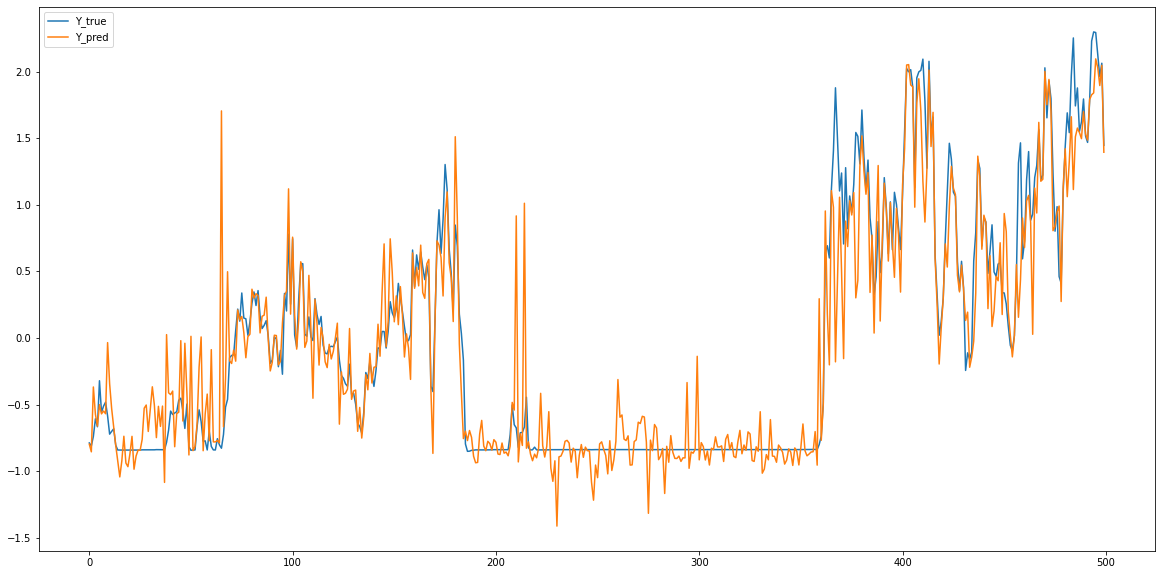

In [ ]:
y_pred=model.predict(X)
plt.figure(figsize=(20, 10))
plt.plot(Y[:500], label='Y_true')
plt.plot(y_pred[:500], label='Y_pred')
plt.legend()

In [ ]:
model=Sequential()
model.add(Dense(units=54, activation='relu', input_shape=(53,)))
model.add(Dense(units=54, activation='relu'))
model.add(Dense(units=27, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mae')

In [ ]:
model.fit(X_train, y_train, epochs=25, verbose=1, validation_split=0.3)

Epoch 1/25
16/16 [==============================] - 0s 12ms/step - loss: 0.0892 - val_loss: 0.3273
Epoch 2/25
16/16 [==============================] - 0s 9ms/step - loss: 0.1026 - val_loss: 0.3301
Epoch 3/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0863 - val_loss: 0.3257
Epoch 4/25
16/16 [==============================] - 0s 8ms/step - loss: 0.0757 - val_loss: 0.3266
Epoch 5/25
16/16 [==============================] - 0s 9ms/step - loss: 0.0740 - val_loss: 0.3194
Epoch 6/25
16/16 [==============================] - 0s 11ms/step - loss: 0.0644 - val_loss: 0.3172
Epoch 7/25
16/16 [==============================] - 0s 12ms/step - loss: 0.0607 - val_loss: 0.3188
Epoch 8/25
16/16 [==============================] - 0s 14ms/step - loss: 0.0538 - val_loss: 0.3114
Epoch 9/25
16/16 [==============================] - 0s 10ms/step - loss: 0.0539 - val_loss: 0.3091
Epoch 10/25
16/16 [==============================] - 0s 11ms/step - loss: 0.0527 - val_loss: 0.3177
Epoch 11/25
1

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 3ms/step - loss: 0.2939


0.29394176602363586

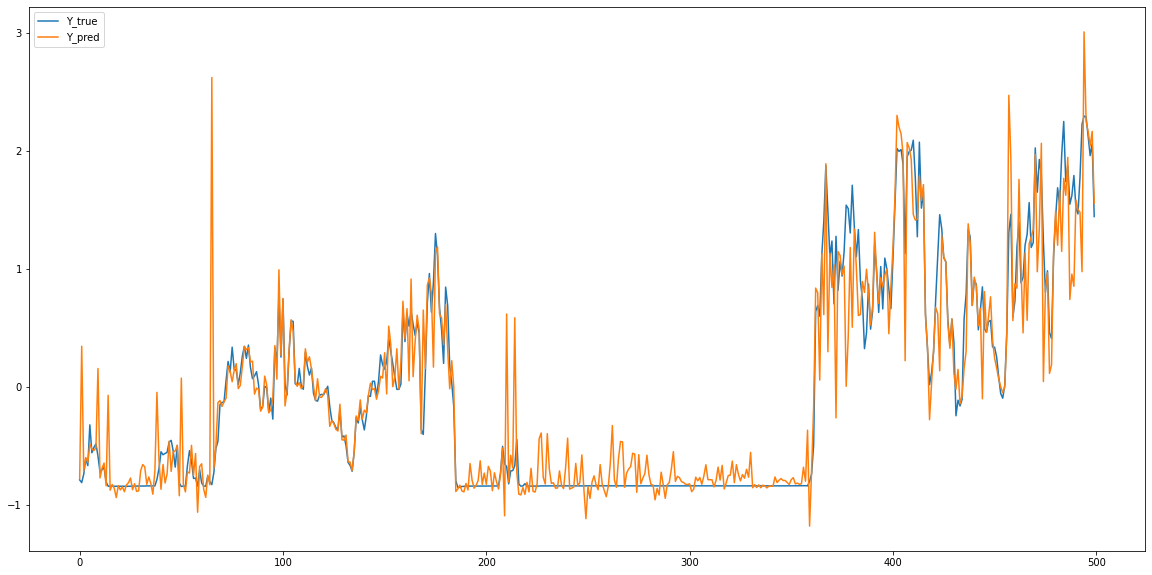

In [ ]:
y_pred=model.predict(X)
plt.figure(figsize=(20, 10))
plt.plot(Y[:500], label='Y_true')
plt.plot(y_pred[:500], label='Y_pred')
plt.legend()

In [ ]:
model=Sequential()
model.add(Dense(units=54, activation='relu', input_shape=(53,)))
model.add(Dense(units=54, activation='relu'))
model.add(Dense(units=27, activation='relu'))
model.add(Dense(units=12, activation='relu'))
model.add(Dense(1))

model.compile(optimizer='adam', loss='mape')

In [ ]:
model.fit(X_train, y_train, epochs=25, verbose=1, validation_split=0.3)

Epoch 1/25
16/16 [==============================] - 1s 15ms/step - loss: 116.7445 - val_loss: 137.3112
Epoch 2/25
16/16 [==============================] - 0s 6ms/step - loss: 103.6623 - val_loss: 116.6942
Epoch 3/25
16/16 [==============================] - 0s 5ms/step - loss: 99.1669 - val_loss: 147.6663
Epoch 4/25
16/16 [==============================] - 0s 4ms/step - loss: 94.2020 - val_loss: 109.7040
Epoch 5/25
16/16 [==============================] - 0s 4ms/step - loss: 85.2176 - val_loss: 118.3674
Epoch 6/25
16/16 [==============================] - 0s 5ms/step - loss: 77.8651 - val_loss: 113.1035
Epoch 7/25
16/16 [==============================] - 0s 4ms/step - loss: 72.3070 - val_loss: 109.4808
Epoch 8/25
16/16 [==============================] - 0s 5ms/step - loss: 73.1478 - val_loss: 117.3863
Epoch 9/25
16/16 [==============================] - 0s 5ms/step - loss: 69.6483 - val_loss: 123.9634
Epoch 10/25
16/16 [==============================] - 0s 4ms/step - loss: 66.1524 - val_l

In [ ]:
model.evaluate(X_test, y_test)

10/10 [==============================] - 0s 2ms/step - loss: 63.8571


63.85714340209961

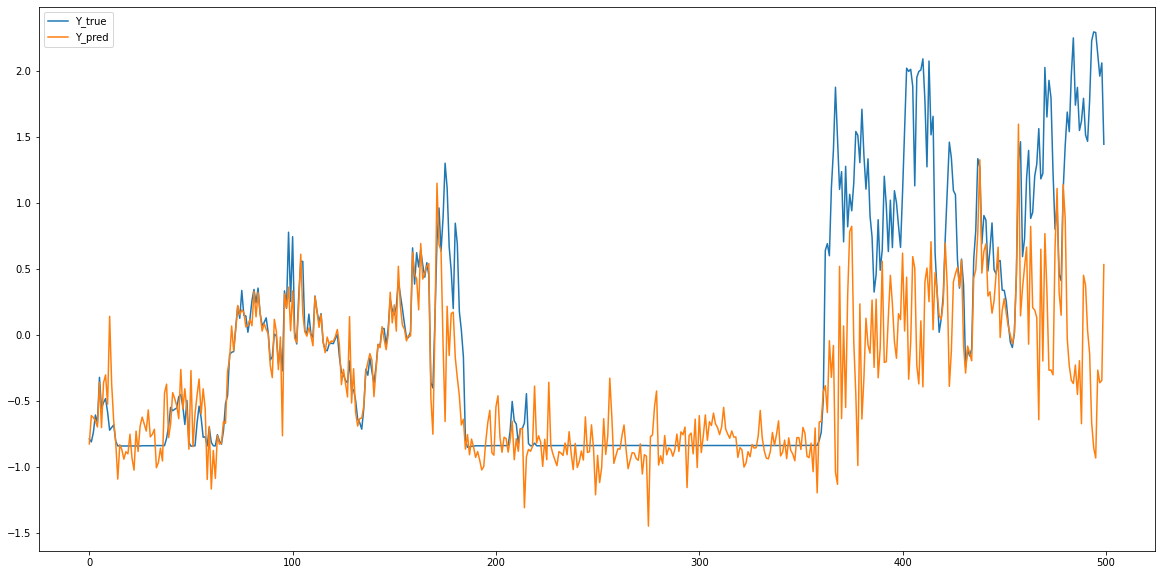

In [ ]:
y_pred=model.predict(X)
plt.figure(figsize=(20, 10))
plt.plot(Y[:500], label='Y_true')
plt.plot(y_pred[:500], label='Y_pred')
plt.legend()